<a href="https://colab.research.google.com/github/DevangKashyap/Fake-News-Detection/blob/main/fknews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
import tensorflow as tk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

Exploring Fake news

In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/13772405e466cd4ccc2b2318d0bab8e3744e3b42/data/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

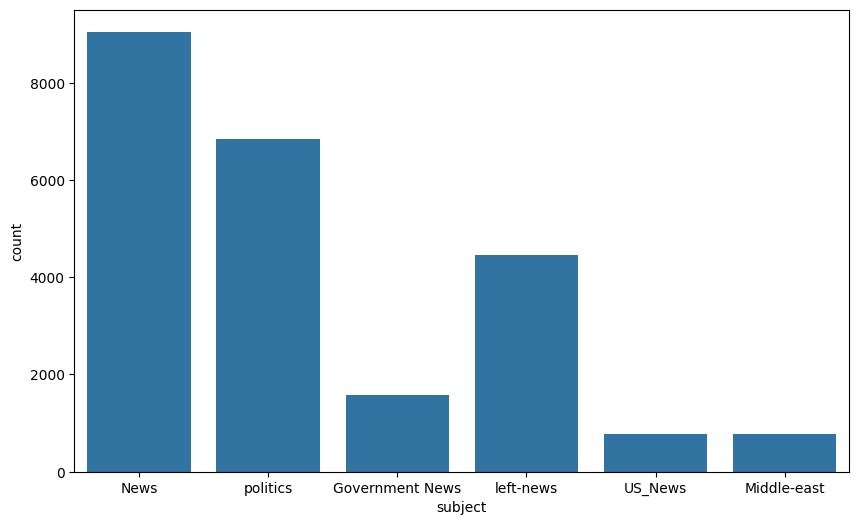

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

Word Cloud

In [ ]:
text = ' '.join(fake['text'].tolist())

In [ ]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

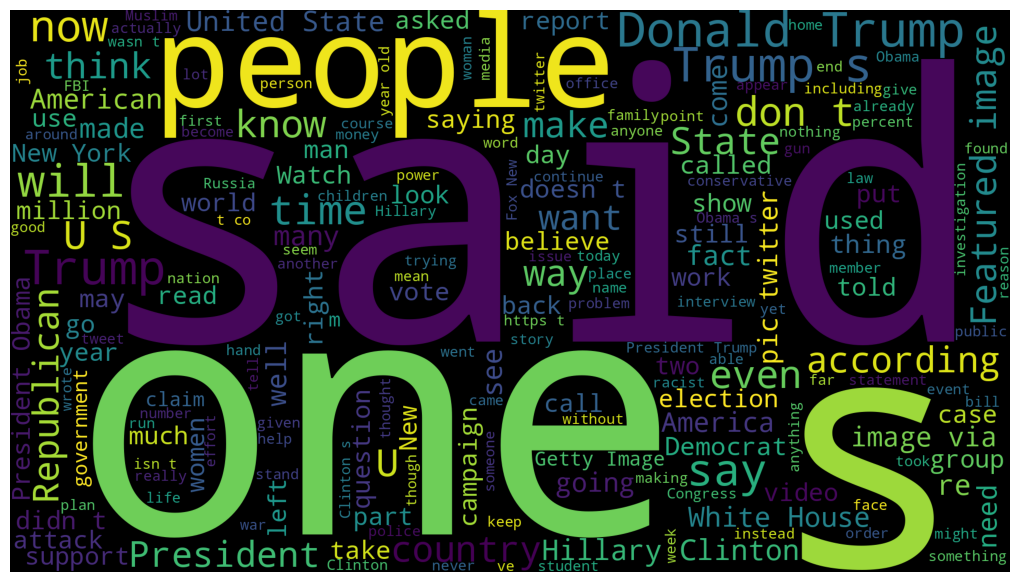

In [ ]:
text = ' '.join(fake['text'].tolist())
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Exploring Real News

In [ ]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/13772405e466cd4ccc2b2318d0bab8e3744e3b42/data/True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
text = ' '.join(real['text'].tolist())

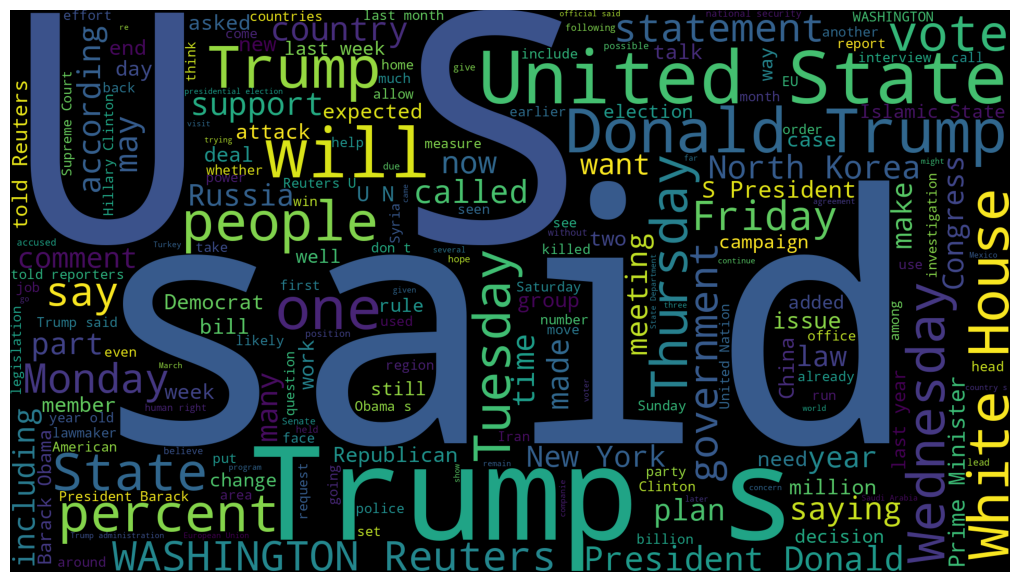

In [ ]:
text = ' '.join(real['text'].tolist())
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10,10))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

Cleaning data

In [ ]:
real.sample(5)

,title,text,subject,date
2767,Trump says wall may not need to cover entire U...,PARIS (Reuters) - President Donald Trump said ...,politicsNews,"July 13, 2017"
16853,Graft probe into Mexico president's ally poses...,MEXICO CITY (Reuters) - With a tight general e...,worldnews,"October 21, 2017"
17029,Iran's Guards say missile programme will accel...,ANKARA (Reuters) - Iran s elite Islamic Revolu...,worldnews,"October 19, 2017"
5464,Ryan: Trump made right decision to seek Flynn ...,WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"February 14, 2017"
16045,German FDP leader presses Greens to compromise...,BERLIN (Reuters) - Germany s Greens need to co...,worldnews,"October 31, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [ ]:
real.iloc[8970]

,8970
title,Graphic: Supreme Court roundup
text,
subject,politicsNews
date,"June 16, 2016"


In [ ]:
real.drop(8970, axis=0)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
    if index in unknown_publishers:
        publisher.append('Unknown')
        tmp_text.append(row)
    else:
        record = row.split('-', maxsplit=1)
        publisher.append(record[0].strip())
        tmp_text.append(record[1].strip())


In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
empty_fake_index = [index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + "" "" + real['text']
fake['text'] = fake['title'] + "" "" + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

Preprocessing Text

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real = real[['text', 'class']]
fake = fake[['text', 'class']]

In [ ]:
import pandas as pd
data = pd.concat([real, fake], ignore_index=True)

In [ ]:
data.sample(5)

,text,class
24105,watch: white grievance queen tomi lahren gets...,0
39966,boom! 4 venues cancel kathy griffin appearance...,0
42323,france: refugee pays another refugee to rape w...,0
16146,somalia's capital restricts movement of trucks...,1
29249,watch trump’s tense confrontation with protes...,0


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 110.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ppmt0mgh
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ppmt0mgh
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8175 sha256=5eccd2333035b4661fa512e4ee5d505231da6984aa6baf98cdfea073c75fc904
  Stored in directory: /tmp/pip-ephem-wheel-cache-mh83l93i/wheels/5c/94/34/99d5ff65e88b8d9a6c5e8d8652f2311d87790a61a1b7466e21
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installation: preprocess_kgptalkie 0.11
    Uninstalling preprocess_kgptalkie-0.11:
      Successfully uninstalled preprocess_kgptalkie-0.11


In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
ps.remove_special_chars('this ,.@ # is gre@t')

'this   is gret'

Vectorization

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'scriptthe', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'su

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.key_to_index)

251886

In [ ]:
w2v_model.wv['love']

array([-0.8040473 , -1.0189713 ,  1.5960957 , -2.6744947 ,  1.8891675 ,
        1.9359959 ,  1.0703404 , -0.17947762, -1.6311848 ,  1.0232531 ,
        1.5536864 ,  1.4384016 , -1.1088085 , -1.4210914 ,  2.829958  ,
        0.51223266, -1.5635791 ,  1.637851  ,  0.63648903, -0.39419842,
       -0.80740374,  0.48944342, -2.3222077 ,  2.9022808 , -0.14540629,
        1.4179491 ,  1.8949991 ,  0.81338894,  1.0774299 , -3.0456882 ,
       -2.8348484 ,  2.1913753 , -3.576376  ,  1.0249436 , -1.0927936 ,
       -1.7510316 , -1.7448208 , -2.891134  ,  0.04939547, -4.3945293 ,
        0.94964206, -2.941746  ,  3.584182  , -1.5779923 , -0.03965243,
       -0.00948062, -1.3385168 , -7.511828  , -1.8428952 ,  1.0566914 ,
       -0.8518125 , -3.5315986 , -1.0149746 , -1.3846409 ,  2.3481596 ,
        0.7064005 , -0.7732154 , -1.7111077 ,  0.8832847 , -1.576866  ,
       -0.42847428,  0.49483013, -0.61514425,  1.6484458 ,  1.0123712 ,
        0.18322809, -0.6664398 ,  0.03990645, -5.585814  ,  0.69

In [ ]:
w2v_model.wv['india']
w2v_model.wv.most_similar('india')

[('pakistan', 0.7189769148826599),
 ('malaysia', 0.6630579829216003),
 ('gwadar', 0.63433438539505),
 ('china', 0.6338239908218384),
 ('beijings', 0.6256276369094849),
 ('australia', 0.623932957649231),
 ('asia', 0.6059158444404602),
 ('indian', 0.604262113571167),
 ('indonesia', 0.6023649573326111),
 ('thailand', 0.600659191608429)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'at': 26,
 'this': 27,
 'are': 28,
 'who': 29,
 'an': 30,
 'they': 31,
 'us': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'about': 37,
 'president': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'its': 54,
 'out': 55,
 'if': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'over': 64,
 'no': 65,
 'there': 66,
 'house': 67,
 'our': 68,
 'states': 69,
 'clinton': 70,
 'donald': 71,
 'government': 72,
 'obama': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'than': 77,
 'so': 78,
 'other': 79,
 'republican': 80,
 'so

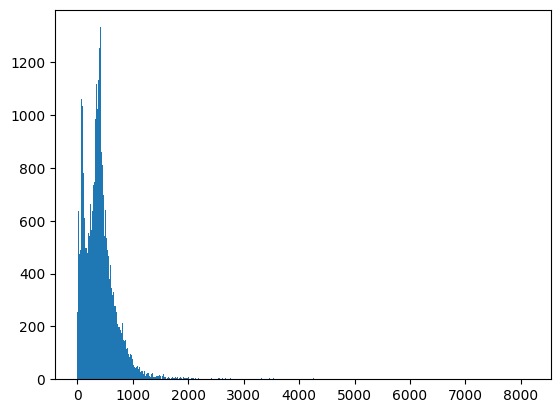

In [ ]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1580

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[101])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros((vocab_size, DIM))
    for word, i in tokenizer.word_index.items():
        weight_matrix[i] = model.wv[word]
    return weight_matrix

In [ ]:
embedding_vector = get_weight_matrix(w2v_model)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vector], input_length=maxlen, trainable=False))
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vector], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['acc'])
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │      25,188,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,188,700 (96.09 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 25,188,700 (96.09 MB)

None


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - acc: 0.9158 - loss: 0.2055 - val_acc: 0.9678 - val_loss: 0.0877
Epoch 2/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - acc: 0.9662 - loss: 0.0948 - val_acc: 0.9800 - val_loss: 0.0597
Epoch 3/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - acc: 0.9857 - loss: 0.0417 - val_acc: 0.9840 - val_loss: 0.0424
Epoch 4/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - acc: 0.9922 - loss: 0.0262 - val_acc: 0.9867 - val_loss: 0.0420
Epoch 5/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - acc: 0.9881 - loss: 0.0333 - val_acc: 0.9918 - val_loss: 0.0228
Epoch 6/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - acc: 0.9974 - loss: 0.0085 - val_acc: 0.9930 - val_loss: 0.0231


In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9934075723830735

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5919
           1       0.99      1.00      0.99      5306

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ['this is a news']

In [ ]:
X_test

array([[    0,     0,     0, ...,    14,   361,   188],
       [    0,     0,     0, ...,  2594,  5686,   498],
       [    0,     0,     0, ...,   125, 20964,  2014],
       ...,
       [    0,     0,     0, ...,  1432,   607,  2241],
       [    0,     0,     0, ...,   174,  1281,  1370],
       [    0,     0,     0, ...,     1,   158,    13]], dtype=int32)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

x = ['this is a news']
maxlen = 10  # Define maxlen here or import it if it's defined elsewhere

# Create a Tokenizer object and fit it to your data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x) # Fit the tokenizer to your text data

x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >= 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


array([[1]])

In [ ]:
x = ['Doctors in India are struggling to diagnose and treat long Covid patients due to limited guidelines and scarce research on the condition. Despite the World Health Organization declaring an end to Covid-19 as a global health emergency, focused efforts are underway globally to estimate the burden of long Covid.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[0]])

In [ ]:
x = ['India has recorded 55 new coronavirus infections, while the active cases have decreased to 1,653, according to the Union Health Ministry data updated on Saturday.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0]])

In [ ]:
x = ['According to a report circulating on social media, an unnamed source claims that a new variant of COVID-19 has been discovered that not only causes mild symptoms but also provides immunity to all previously known variants. This unverified report has led to speculation that people could purposefully expose themselves to this strain to achieve immunity. However, no official health organizations have confirmed the existence of such a variant, and experts caution against believing unverified claims.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1]])

In [ ]:
x = ['In a move aimed at modernizing India\'s public transportation system, the Ministry of Railways has reportedly drafted a proposal to implement mandatory facial recognition for all passengers using trains and buses by 2025. This initiative, known as the Digital Transit Security Program (DTSP), seeks to reduce ticket fraud, improve security, and streamline passenger identification.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1]])

In [ ]:
x = ['Prime Minister Narendra Modi\'s aircraft suffered a technical snag in Jharkhand\'s Deogarh district on Friday, delaying his return to Delhi.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
(model.predict(x) >=0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0]])

In [ ]:
model.save('fake_news_model.h5')

In [ ]:
from google.colab import files
files.download('fake_news_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>